In [1]:
import sklearn

import numpy as np
import matplotlib.pyplot as plt



# Linear regression

## Data

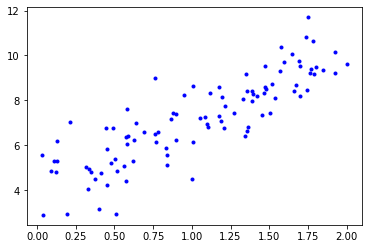

In [2]:
m = 100 

np.random.seed(2024)

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

## training and validation sets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2024)

X_train.shape, X_val.shape

((80, 1), (20, 1))

## Linear Regression model

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)



LinearRegression()

## training and validation mse

In [5]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_mse

0.9703078327585434

In [6]:
val_pred = lin_reg.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)
val_mse

1.25335481606642

# Polynomial Regression

## Data

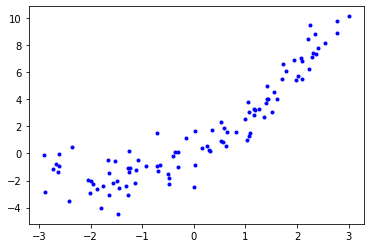

In [7]:
np.random.seed(2024)

m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

## Polynomial features

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)

X_poly = poly_features.fit_transform(X)



In [9]:
X.shape, X_poly.shape

((100, 1), (100, 3))

In [10]:
X[:5, :], X_poly[:5, :]

(array([[ 0.52808711],
        [ 1.19465249],
        [-1.87108824],
        [-2.73714862],
        [-1.76988629]]),
 array([[  0.52808711,   0.278876  ,   0.14727082],
        [  1.19465249,   1.42719456,   1.70500153],
        [ -1.87108824,   3.5009712 ,  -6.55062604],
        [ -2.73714862,   7.49198255, -20.50666969],
        [ -1.76988629,   3.13249746,  -5.5441643 ]]))

## Learning Curve

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[:5,:]

array([[ 0.52808711,  0.278876  ],
       [ 1.19465249,  1.42719456],
       [-1.87108824,  3.5009712 ],
       [-2.73714862,  7.49198255],
       [-1.76988629,  3.13249746]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2)#, random_state=2024)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

train_mses, val_mses = [], []

for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    
    # training mse
    y_train_pred = model.predict(X_train[:m])
    train_mse = mean_squared_error(y_train[:m], y_train_pred)

    # validation mse
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_mses.append(train_mse)
    val_mses.append(val_mse)

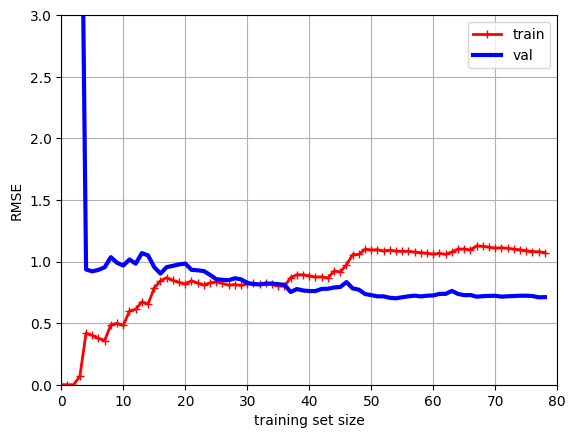

In [16]:
plt.plot(np.sqrt(train_mses), 'r-+', linewidth=2, label = 'train')
plt.plot(np.sqrt(val_mses), 'b-', linewidth = 3, label = 'val')

plt.grid()
plt.xlabel("training set size")
plt.ylabel("RMSE")

plt.axis([0,80, 0, 3])
plt.legend()

plt.show()

## Learning curve using sklearn

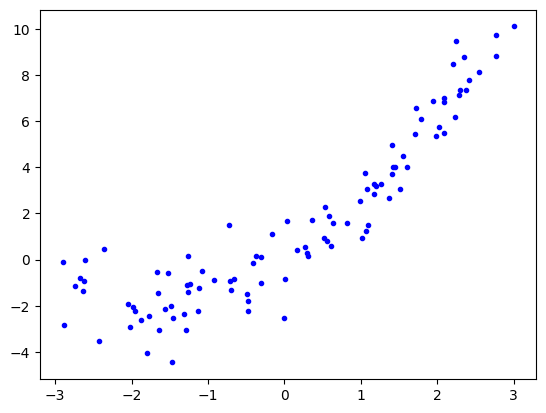

In [17]:
np.random.seed(2024)

m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X * 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:2052: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 79 instead of 80.
  warnings.warn(


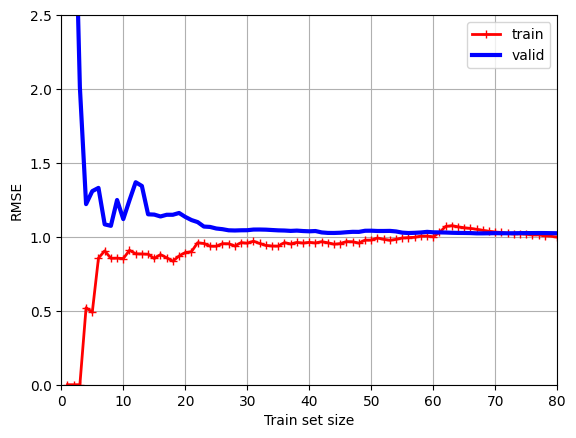

In [35]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

poly_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

train_size, train_scores, valid_scores = learning_curve(
    poly_regression, X, y, train_sizes=np.linspace(0.01, 1, 80),
    cv=5, scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_size, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_size, valid_errors, 'b-', linewidth=3, label='valid')

plt.axis([0, 80, 0, 2.5])
plt.xlabel("Train set size")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()


In [26]:
train_errors

array([-0.        , -0.        ,  0.2587588 ,  0.88276972,  0.94983982,
        1.25126184,  1.16237779,  1.12770142,  1.07157384,  1.14763118,
        1.11028572,  1.06772692,  1.0745509 ,  1.36202263,  1.31995168,
        1.31843938,  1.28836771,  1.25514912,  1.28395899,  1.29138947,
        1.31799748,  1.40908019,  1.51276513,  1.49189362,  1.52613472,
        1.51532777,  1.52728737,  1.52045534,  1.53739881,  1.54350506,
        1.62367468,  1.61005754,  1.5918104 ,  1.57828369,  1.57959567,
        1.59505297,  1.58564235,  1.59721777,  1.59497039,  1.59427726,
        1.59009578,  1.61957897,  1.60850333,  1.5952769 ,  1.6036023 ,
        1.63634959,  1.63270235,  1.62269157,  1.63259415,  1.64232915,
        1.67410956,  1.66846392,  1.65615714,  1.669225  ,  1.68265614,
        1.70093111,  1.69843822,  1.71827593,  1.70428166,  1.70188478,
        1.74781332,  1.74347421,  1.74084268,  1.72919043,  1.72450938,
        1.72239513,  1.73241143,  1.7204149 ,  1.71055713,  1.70

In [23]:
train_scores

array([[-0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.669597  , -0.15604925, -0.15604925, -0.15604925, -0.15604925],
       [-0.58939794, -0.95611267, -0.95611267, -0.95611267, -0.95611267],
       [-0.66674917, -1.02061248, -1.02061248, -1.02061248, -1.02061248],
       [-0.97851181, -1.31944935, -1.31944935, -1.31944935, -1.31944935],
       [-0.9068583 , -1.22625766, -1.22625766, -1.22625766, -1.22625766],
       [-1.00641476, -1.15802308, -1.15802308, -1.15802308, -1.15802308],
       [-0.98941944, -1.09211244, -1.09211244, -1.09211244, -1.09211244],
       [-0.9457751 , -1.1980952 , -1.1980952 , -1.1980952 , -1.1980952 ],
       [-0.94468478, -1.15168596, -1.15168596, -1.15168596, -1.15168596],
       [-0.92727611, -1.10283963, -1.10283963, -1.10283963, -1.10283963],
       [-0.91171733, -1.11525929, -1.11525929, -1.11525929, -1.11525929],
       [-0.87856757, -1.48288639, -1.4